#  Exploring Gun Deaths in the US

 i wrote this notebook to explore the Gun Deaths in US 
 The dataset contains information on gun deaths in the US from 2012 to 2014. Each row in the dataset represents a single fatality. The columns contain demographic and other information about the victim .

#### The columns of the datasets are self-explanatory, however few need to clarified:
* police: 0 or 1 (0 means no police were involved)
* intent: value could be Suicide, Accidental, NA, Homicide, or Undetermined
* race: value could be Asian/Pacific Islander, Native American/Native Alaskan, Black, Hispanic, or White
* education: 1 -- Less than High School 2 -- Graduated from High School or equivalent 3 -- Some College 4 -- At least graduated from College 5 -- Not available
* We'll be using another dataset called "census.csv" which has one row consists of population counts.

#### first step 
1-import need packages and load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
## load Gun data set
gun = pd.read_csv('G:\\coursera\\books\\practical_notebooks\\full_data.csv')


#### second step 
2- explore the data set

In [3]:
gun.head(4)

,ID,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,4.0


In [4]:
### explore the whole the datset first

print "the shape of the data set " ,gun.shape
print "column names" , gun.columns

the shape of the data set  (100798, 11)
column names Index([u'ID', u'year', u'month', u'intent', u'police', u'sex', u'age', u'race',
       u'hispanic', u'place', u'education'],
      dtype='object')


In [5]:
## explore each variable values


gun['year'].value_counts()

2013    33636
2014    33599
2012    33563
Name: year, dtype: int64

In [6]:
gun['intent'].value_counts()

Suicide         63175
Homicide        35176
Accidental       1639
Undetermined      807
Name: intent, dtype: int64

In [7]:
for i in gun.columns:
    if i not in ('ID', 'age'):
        print " exploration of ",i,"values"
        print gun[i].value_counts()
        print "========================"

 exploration of  year values
2013    33636
2014    33599
2012    33563
Name: year, dtype: int64
 exploration of  month values
7     8989
8     8783
6     8677
5     8669
9     8508
4     8455
12    8413
10    8406
3     8289
1     8273
11    8243
2     7093
Name: month, dtype: int64
 exploration of  intent values
Suicide         63175
Homicide        35176
Accidental       1639
Undetermined      807
Name: intent, dtype: int64
 exploration of  police values
0    99396
1     1402
Name: police, dtype: int64
 exploration of  sex values
M    86349
F    14449
Name: sex, dtype: int64
 exploration of  race values
White                             66237
Black                             23296
Hispanic                           9022
Asian/Pacific Islander             1326
Native American/Native Alaskan      917
Name: race, dtype: int64
 exploration of  hispanic values
100    91467
210     5463
260      842
270      420
282      399
281      352
998      309
211      280
220      214
226      174

## exploring Gun Deaths by year and months in each year

In [8]:
y=[] ## years list
m=[] ## months list
c=[] ## count list
## loop through years and months in each year and count rows for this month and then append to lists above  
for year in [2012,2013,2014] :
    for i in range(1,13): 
        x =gun[(gun["year"]==year) & (gun["month"]==i)]['month']
        y.append(year)
        m.append(i)
        c.append(x.count())
        #print x 
## create data frame ans append the above list to it         
counts_by_months_year = pd.DataFrame(columns=['year','month','count'])
counts_by_months_year['year']=y
counts_by_months_year['month']=m
counts_by_months_year['count']=c
## concate years and months in new column i will use it to plot counts
month_year=[]
for i,n in  zip(counts_by_months_year['year'],counts_by_months_year['month']):
           string= str(i)+'-'+str(n)
           month_year.append(string)
counts_by_months_year['month_year']=month_year            

In [9]:
counts_by_months_year

,year,month,count,month_year
0,2012,1,2758,2012-1
1,2012,2,2357,2012-2
2,2012,3,2743,2012-3
3,2012,4,2795,2012-4
4,2012,5,2999,2012-5
5,2012,6,2826,2012-6
6,2012,7,3026,2012-7
7,2012,8,2954,2012-8
8,2012,9,2852,2012-9
9,2012,10,2733,2012-10


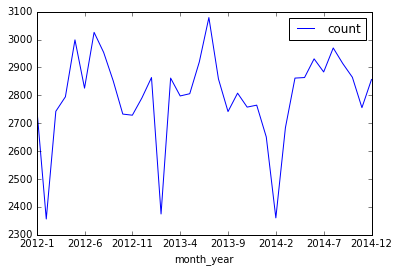

In [10]:
counts_by_months_year.plot(x="month_year",
             y="count"
             )

### exploring Gun Deaths by Race and sex

In [11]:
gun.head(2)

,ID,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0


In [12]:
## i will divide the data frame into two group F and M 
gun_sex_M = gun[gun['sex']=='M']
gun_sex_F = gun[gun['sex']=='F']

In [13]:
print "number of male deaths   = " ,gun_sex_M['sex'].count()
print "number of female deaths = ",gun_sex_F['sex'].count()

number of male deaths   =  86349
number of female deaths =  14449


In [14]:
### exploring in each year 
print "number of female died in each year"
print gun_sex_F['year'].value_counts()

print "number of male died in each year"
gun_sex_M['year'].value_counts()

number of female died in each year
2014    4882
2013    4842
2012    4725
Name: year, dtype: int64
number of male died in each year


2012    28838
2013    28794
2014    28717
Name: year, dtype: int64

In [15]:
## explore by race 
## we can use groupby function but let's try it by loo
race_counts ={}
for line in gun['race']:
        if line not in race_counts:
             race_counts[line] = 1
        else:
            race_counts[line] += 1  

In [16]:
race_counts 

{'Asian/Pacific Islander': 1326,
 'Black': 23296,
 'Hispanic': 9022,
 'Native American/Native Alaskan': 917,
 'White': 66237}

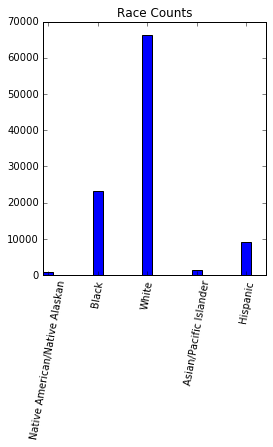

In [17]:
fig = plt.figure(figsize=(4,10))

 
ax2 = fig.add_subplot(212)
ax2.bar(left=list(range(1,len(race_counts)+1)),height=race_counts.values(),width=0.2)
ax2.set_xticks([i+0.2/2 for i in range(1,len(race_counts)+1)])
ax2.set_xticklabels(race_counts.keys(),rotation=80)
ax2.set_title("Race Counts")

plt.show()

### Reading census dataset

In [18]:
census = pd.read_csv("G:\\coursera\\books\\practical_notebooks\\census.csv")

### now i want to  Compute Rates Of Gun Deaths Per Race
Rate of gun deaths per 100,000 people in each race

In [19]:
whole_race_counts = {
    "Asian/Pacific Islander": 15159516 + 674625,
    "Native American/Native Alaskan": 3739506,
    "Black": 40250635,
    "Hispanic": 44618105,
    "White": 197318956
}
death_race_counts ={'Asian/Pacific Islander': 1326,
 'Black': 23296,
 'Hispanic': 9022,
 'Native American/Native Alaskan': 917,
 'White': 66237}
race_rate = {}
## because the values in mapping are very large when divide race counts over it it will result 0 so i will import 
from __future__ import division
for k,v in death_race_counts.items():
    race_rate[k] = (v / whole_race_counts[k]) * 100000

In [20]:
race_rate

{'Asian/Pacific Islander': 8.374309664161762,
 'Black': 57.8773477735196,
 'Hispanic': 20.220491210910907,
 'Native American/Native Alaskan': 24.521955573811088,
 'White': 33.56849303419181}

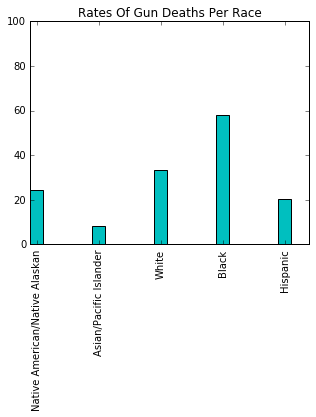

In [21]:
## plot the result of rates 
figure = plt.figure(figsize=(5,4))

ax = figure.add_subplot(111)
  
ax.bar(left=list(range(1,len(race_rate)+1)),height=race_rate.values(),width=0.2,color='c')
ax.set_ylim(0,100) # 100%
ax.set_xticks([i+0.2/2 for i in range(1,len(race_rate)+1)])
ax.set_xticklabels(race_rate.keys(),rotation=90)
ax.set_title("Rates Of Gun Deaths Per Race")

plt.show()

### rates of Gun deaths per race filtered by Homicide per 10,0000

In [22]:
gun.head(3)

,ID,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0


In [23]:
## filter the data to contain Homicide only 
gun_homicide_deaths = gun[gun['intent']=='Homicide']

In [24]:
## extract race 
death_race ={}
for i in gun_homicide_deaths['race']:
        if i not in death_race:
            death_race[i]=1
        else:
            death_race[i] +=1

In [25]:
## now as i did above i will compute the rate to the whole race populations
homicide_rates ={}
for k,v in death_race.items() :
     homicide_rates[k] = (v/whole_race_counts[k])*100000


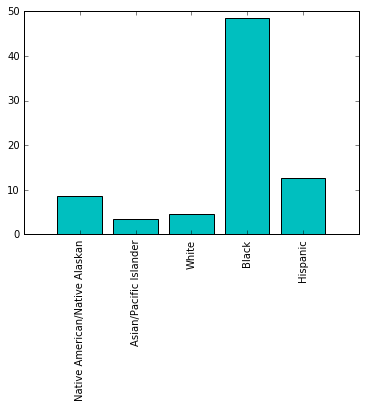

In [26]:
## now plot also as i did above

plt.bar(range(len(homicide_rates)), homicide_rates.values(), align='center',color='c')
plt.xticks(range(len(homicide_rates)), homicide_rates.keys(),rotation =90 )

plt.show()


In [31]:
## homicide and gender 
## i want to know the count of females and males who died (Homicide) and plot those counts
gender_homicide ={'female':gun_homicide_deaths[gun_homicide_deaths['sex']=='F']['sex'].count()
                  ,'male':gun_homicide_deaths[gun_homicide_deaths['sex']=='M']['sex'].count()}
gun_homicide_deaths.head(4)

,ID,year,month,intent,police,sex,age,race,hispanic,place,education
14,15,2012,3,Homicide,0,M,27.0,White,100,Home,2.0
18,19,2012,3,Homicide,0,M,31.0,Asian/Pacific Islander,100,Home,3.0
22,23,2012,4,Homicide,0,F,47.0,Black,100,Home,2.0
24,25,2012,4,Homicide,0,M,51.0,White,100,Other specified,2.0


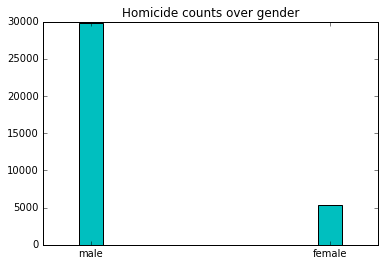

In [48]:
plt.bar(range(len(gender_homicide)),gender_homicide.values(),align='center',color='c',width=0.1)
plt.xticks(range(len(gender_homicide)),gender_homicide.keys(),rotation=0)
plt.title('Homicide counts over gender')

## now i want to explore deaths with education level
what is the percentage of each education level in the gun death dataset 

In [72]:
## first count each education level
education_rates ={}
for i in gun['education'] :
    if str(i) not in education_rates.keys() :
        education_rates[str(i)] =1
    else:
        education_rates[str(i)] +=1 
## now i want to replace keys with more meaning  words
for key in education_rates.keys():
    if key =='1.0':
        education_rates['Less than High School'] =education_rates[key]
        del education_rates[key]
    elif key =='2.0' :
        education_rates['Graduated from High School or equivalent '] =education_rates[key]
        del education_rates[key]
    elif key =='3.0' :    
        education_rates['Some College '] =education_rates[key]   
        del education_rates[key]
    elif key =='4.0' :    
        education_rates['At least graduated from College'] =education_rates[key]   
        del education_rates[key]
    else  :
        education_rates['Not available'] =education_rates[key]
        del education_rates[key]

In [73]:
 education_rates

{'At least graduated from College': 12946,
 'Graduated from High School or equivalent ': 42927,
 'Less than High School': 21823,
 'Not available': 53,
 'Some College ': 21680}

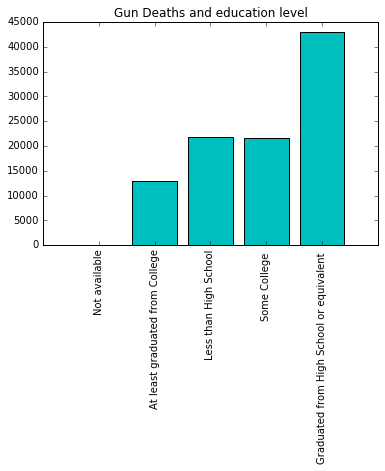

In [88]:
## now plot the dict as i did above
 
plt.bar(range(len(education_rates)),education_rates.values() , align='center',color='c')

plt.xticks(range(len(education_rates)),education_rates.keys() ,rotation=90)
plt.title('Gun Deaths and education level')
plt.show()

## Gun deaths and places

In [89]:
gun.head(3)

,ID,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0


In [90]:
gun['place'].value_counts()

Home                       60486
Other specified            13751
Street                     11151
Other unspecified           8867
Trade/service area          3439
School/instiution            671
Farm                         470
Industrial/construction      248
Residential institution      203
Sports                       128
Name: place, dtype: int64

In [119]:
places_count={}
for i in gun['place'] :
    if i not in places_count :
        places_count[i] =1
    else :
        places_count[i] +=1
for key,value in places_count.items():
    places_count[key]=(value/len(gun) )*100
    

In [120]:
places_count

{nan: 1.37304311593484,
 'Farm': 0.46627909283914365,
 'Home': 60.00714299886902,
 'Industrial/construction': 0.24603662771086726,
 'Other specified': 13.642135756661839,
 'Other unspecified': 8.79680152383976,
 'Residential institution': 0.2013928847794599,
 'School/instiution': 0.6656878112660966,
 'Sports': 0.12698664656044764,
 'Street': 11.062719498402746,
 'Trade/service area': 3.411774043135776}

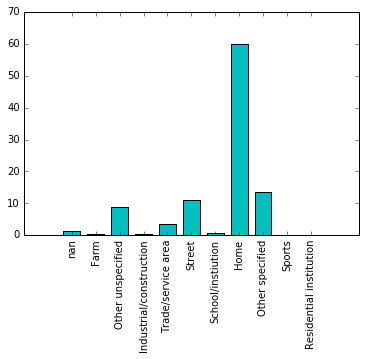

In [121]:
plt.bar(range(len(places_count)),places_count.values(),align='center',width=0.7,color='c')

plt.xticks(range(len(places_count)),places_count.keys(),rotation=90  )
plt.show()

#### this the end of this notebook . 
i will return to it again to apply new data exploration techinque that i will learn and machine learning algorithms also